In [32]:
# print_function for compatibility with Python 3

from __future__ import print_function

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline 

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm (added later)

from sklearn.cluster import KMeans

In [16]:
# Import analytical base table
base_df =pd.read_csv('analytical_base_table.csv')

# Import thresholded item features
threshold_item_data =pd.read_csv('threshold_item_data.csv')

# Import PCA item features

pca_item_data =pd.read_csv('pca_item_data.csv')



In [34]:
threshold_item_data.set_index('CustomerID',inplace=True)
pca_item_data.set_index('CustomerID',inplace=True)
base_df.set_index('CustomerID',inplace=True)

In [35]:
# Print shape of each dataframe
ls =[base_df,threshold_item_data,pca_item_data]
for i in ls:
    print (i.shape)

(414, 8)
(414, 20)
(414, 125)


In [39]:
# Join base_df with threshold_item_data
threshold_df=base_df.join(threshold_item_data)

# Display first 5 rows of threshold_df
threshold_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0,1,...,0,0,0,0,1,0,0,2,0,5


In [41]:
# Join base_df with pca_item_dat
pca_df= base_df.join(pca_item_data)
# Display first 5 rows of pca_df
pca_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876140,4.828908,...,-0.287183,0.180107,-0.067891,0.446641,0.612589,-0.068337,-0.368486,-0.614079,0.040555,-0.536834
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219833,1.226228,...,-0.479025,-0.784684,1.242603,0.844374,-1.739989,0.756197,0.900938,-0.101712,-0.515705,3.867288
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260833,2.387628,...,-1.520954,2.777021,-1.295895,0.577675,-0.224062,-1.365487,-0.654526,-1.202683,-0.664729,-4.142010
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929318,-0.714870,...,2.163672,-1.003627,0.425208,0.175096,-0.466048,-0.026856,-0.445150,0.385755,-1.065481,-0.435658
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053140,2.110815,...,-5.719881,3.104791,3.839123,2.906790,-1.023003,-10.385841,-2.489582,-4.326571,3.195885,-1.705039


In [42]:
# First 5 observations of base_df
base_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000


In [43]:
# K-Means model pipeline
k_means=make_pipeline(StandardScaler(), KMeans(n_clusters=3,random_state=123))

In [44]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [45]:
# Save clusters to base_df
base_df['cluster']=k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,1
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0


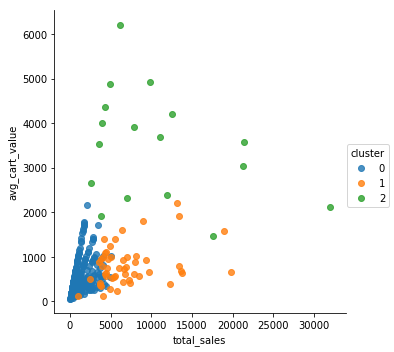

In [46]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y='avg_cart_value',hue='cluster',data=base_df, fit_reg=False)

<span id="threshold"></span>
# Threshold DF



In [47]:
# K-Means model pipeline
k_means_th =make_pipeline(StandardScaler(), KMeans(n_clusters=3,random_state=123))

In [48]:
# Fit K-Means pipeline
k_means_th.fit(threshold_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [49]:
# Save clusters to threshold_df
threshold_df['cluster']=k_means_th.predict(threshold_df)

# Display first 5 rows of threshold_df
threshold_df.head(5)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,0,0,...,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,0,0,...,0,0,0,0,0,0,0,0,4,2
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,0,0,...,0,0,0,0,1,1,1,1,1,2
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,0,0,...,1,0,0,0,0,0,0,0,1,2
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,0,1,...,0,0,0,1,0,0,2,0,5,2


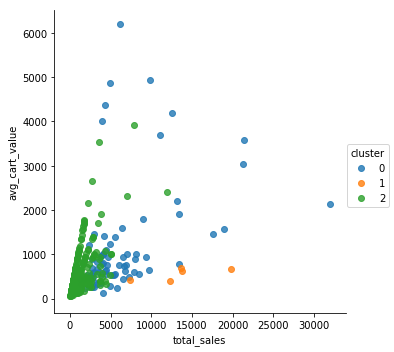

In [53]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y='avg_cart_value',data =threshold_df,hue='cluster',fit_reg=False)

<span id="pca"></span>
# PCA DF



In [58]:
# K-Means model pipeline
k_means_pc=make_pipeline(StandardScaler(),KMeans(n_clusters=3,random_state=123))

In [59]:
# Fit K-Means pipeline
k_means_pc.fit(pca_df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [60]:
# Save clusters to pca_df
pca_df['cluster']= k_means_pc.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value,PC1,PC2,...,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286,5.876140,4.828908,...,0.180107,-0.067891,0.446641,0.612589,-0.068337,-0.368486,-0.614079,0.040555,-0.536834,0
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000,-4.219833,1.226228,...,-0.784684,1.242603,0.844374,-1.739989,0.756197,0.900938,-0.101712,-0.515705,3.867288,0
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000,-1.260833,2.387628,...,2.777021,-1.295895,0.577675,-0.224062,-1.365487,-0.654526,-1.202683,-0.664729,-4.142010,0
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000,-4.929318,-0.714870,...,-1.003627,0.425208,0.175096,-0.466048,-0.026856,-0.445150,0.385755,-1.065481,-0.435658,0
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000,-2.053140,2.110815,...,3.104791,3.839123,2.906790,-1.023003,-10.385841,-2.489582,-4.326571,3.195885,-1.705039,0


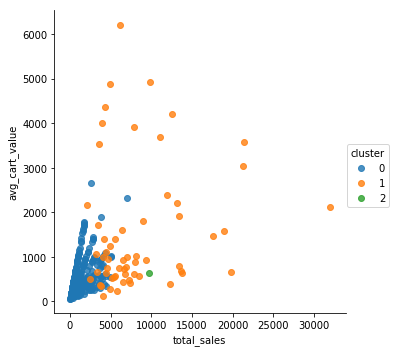

In [61]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales',y='avg_cart_value', data=pca_df,hue='cluster', fit_reg=False)

<span id="comparison"></span>
# Model comparison


In [62]:
# Check all indices are identical
print(all(base_df.index==threshold_df.index))
print(all(base_df.index==pca_df.index))

True
True


In [63]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [64]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.60213549517823428

In [67]:
# Similary between threshold_df.cluster and base_df.cluster
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.61191930366028091

In [69]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster,pca_df.cluster)

0.79862003362483303